## 1. United Nations life expectancy data
<p>Life expectancy at birth is a measure of the average a living being is expected to live. It takes into account several demographic factors like gender, country, or year of birth.</p>
<p>Life expectancy at birth can vary along time or between countries because of many causes: the evolution of medicine, the degree of development of countries, or the effect of armed conflicts. Life expectancy varies between gender, as well. The data shows that women live longer that men. Why? Several potential factors, including biological reasons and the theory that women tend to be more health conscious.</p>
<p>Let's create some plots to explore the inequalities about life expectancy at birth around the world. We will use a dataset from the United Nations Statistics Division, which is available <a href="http://data.un.org/Data.aspx?d=GenderStat&f=inID:37&c=1,2,3,4,5,6&s=crEngName:asc,sgvEngName:asc,timeEngName:desc&v=1">here</a>.</p>

In [51]:
# This sets plot images to a nice size
options(repr.plot.width = 6, repr.plot.height = 6)

# Loading packages
library(dplyr)
library(tidyr)
library(ggplot2)

# Loading data
life_expectancy <- read.csv("datasets/UNdata.csv")

# Taking a look at the first few rows
head(life_expectancy)

,Country.or.Area,Subgroup,Year,Source,Unit,Value,Value.Footnotes
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Afghanistan,Female,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
2,Afghanistan,Female,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
3,Afghanistan,Female,1990-1995,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
4,Afghanistan,Female,1985-1990,UNPD_World Population Prospects_2006 (International estimate),Years,41,NA
5,Afghanistan,Male,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
6,Afghanistan,Male,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA


## 2. Life expectancy of men vs. women by country
<p>Let's manipulate the data to make our exploration easier. We will build the dataset for our first plot in which we will represent the average life expectancy of men and women across countries for the last period recorded in our data (2000-2005).</p>

In [53]:
# Subsetting and reshaping the life expectancy data
subdata <- life_expectancy  %>% 
    filter(Year == "2000-2005") %>%
    select(Country.or.Area, Subgroup, Value) %>%
    spread(Subgroup, Value)

# Taking a look at the first few rows
head(subdata)

,Country.or.Area,Female,Male
,<chr>,<int>,<int>
1,Afghanistan,42,42
2,Albania,79,73
3,Algeria,72,70
4,Angola,43,39
5,Argentina,78,71
6,Armenia,75,68


## 3. Visualize I
<p>A scatter plot is a useful way to visualize the relationship between two variables. It is a simple plot in which points are arranged on two axes, each of which represents one of those variables. </p>
<p>Let's create a scatter plot using <code>ggplot2</code> to represent life expectancy of males (on the x-axis) against females (on the y-axis). We will create a straightforward plot in this task, without many details. We will take care of these kinds of things shortly.</p>

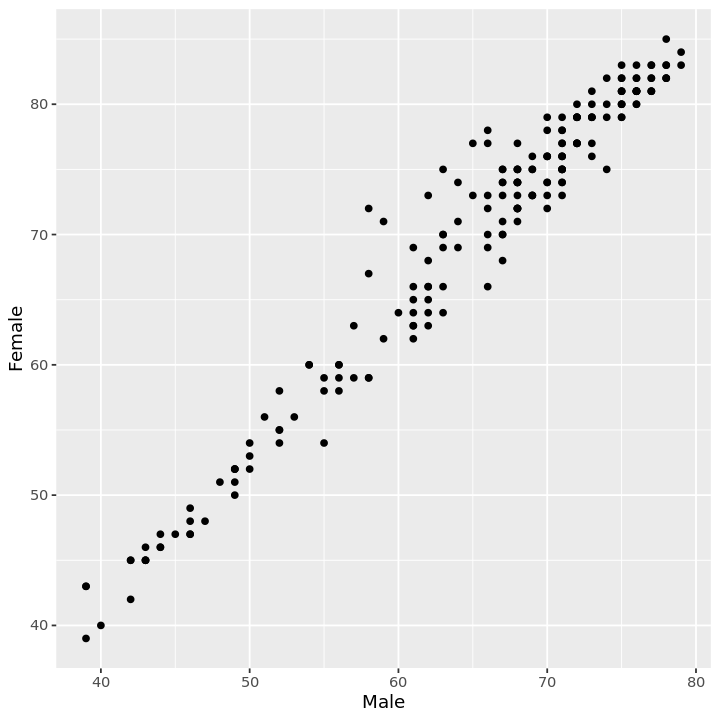

In [55]:
# Plotting male and female life expectancy
ggplot(data = subdata, aes(x = Male, y = Female)) +
    geom_point()

## 4. Reference lines I
<p>A good plot must be easy to understand. There are many tools in <code>ggplot2</code> to achieve this goal and we will explore some of them now. Starting from the previous plot, let's set the same limits for both axes as well as place a diagonal line for reference. After doing this, the difference between men and women across countries will be easier to interpret.</p>
<p>After completing this task, we will see how most of the points are arranged above the diagonal and how there is a significant dispersion among them. What does this all mean?</p>

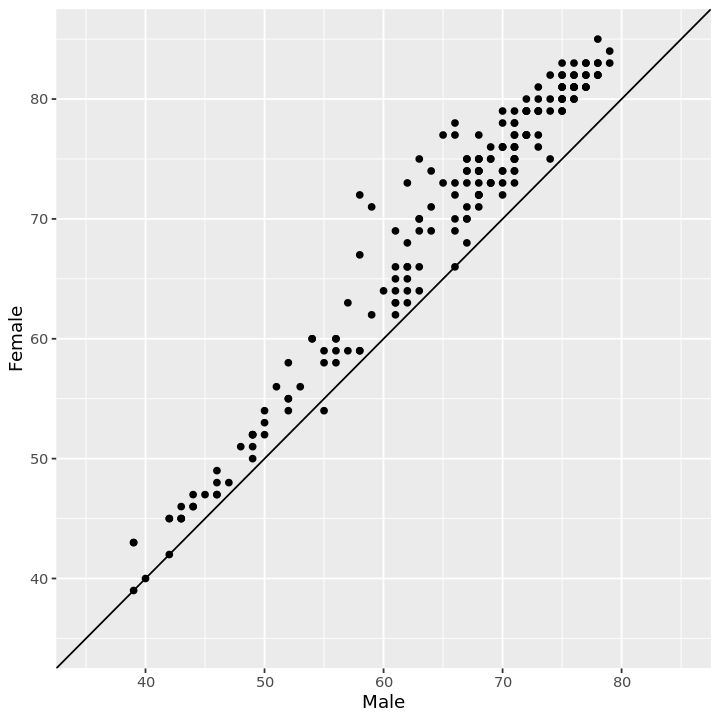

In [57]:
# Adding an abline and changing the scale of axes of the previous plots
ggplot(data = subdata, aes(x = Male, y = Female)) +
    geom_point() +
    geom_abline(slope = 1, intercept = 0) +
    xlim(35,85) +
    ylim(35,85)

## 5. Plot titles and axis labels
<p>A key point to make a plot understandable is placing clear labels on it. Let's add titles, axis labels, and a caption to refer to the source of data. Let's also change the appearance to make it clearer.</p>

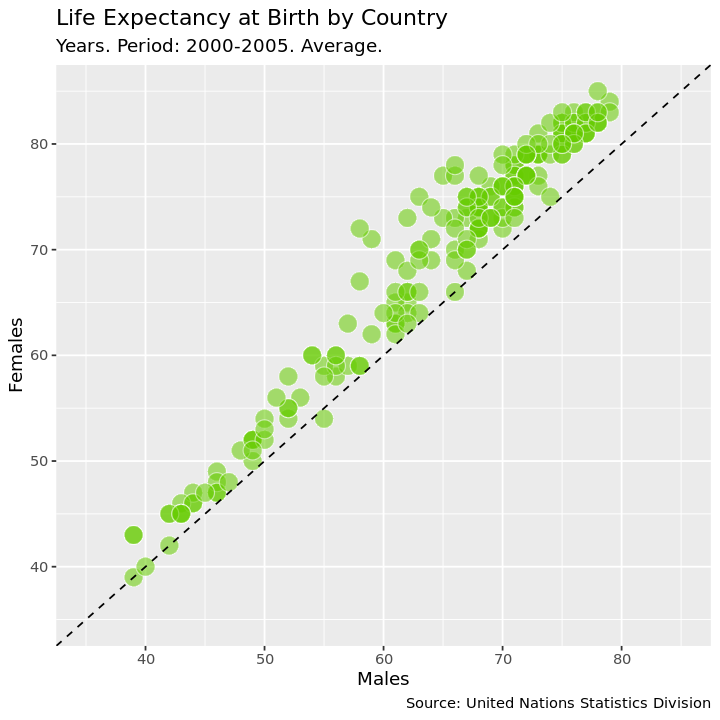

In [59]:
# Adding labels to previous plot
ggplot(subdata, aes(x=Male, y=Female))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(35,85))+
  scale_y_continuous(limits=c(35,85))+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Period: 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")

## 6. Highlighting remarkable countries I
<p>Now, we will label some points of our plot with the name of its corresponding country. We want to draw attention to some special countries where the gap in life expectancy between men and women is significantly high. These will be the final touches on this first plot.</p>

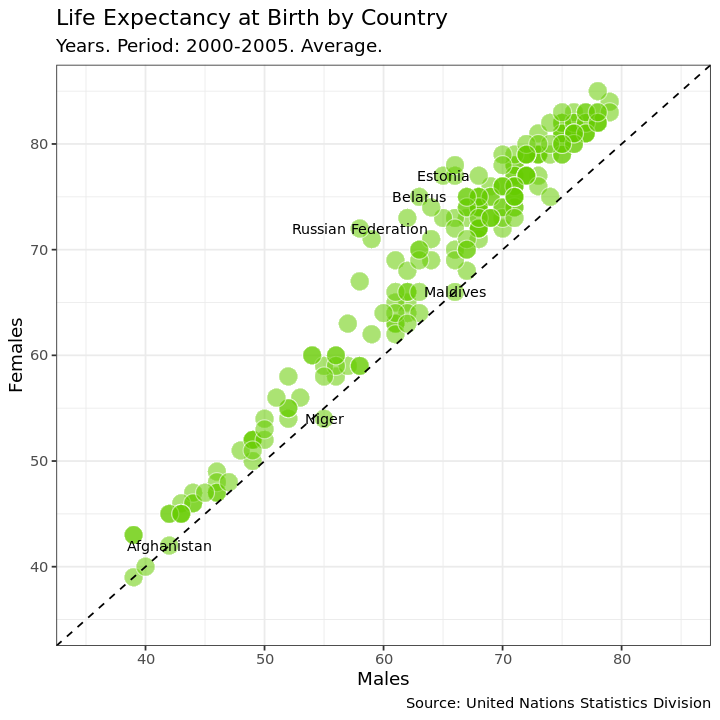

In [61]:
# Subseting data to obtain countries of interest
top_male <- subdata %>% arrange(Male-Female) %>% head(3)
top_female <- subdata %>% arrange(Female-Male) %>% head(3)

# Adding text to the previous plot to label countries of interest
ggplot(subdata, aes(x=Male, y=Female, label = Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(35,85))+
  scale_y_continuous(limits=c(35,85))+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Period: 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
       geom_text(data = top_male, size = 3)+
       geom_text(data = top_female, size = 3)+
       theme_bw()

## 7. How has life expectancy by gender evolved?
<p>Since our data contains historical information, let's see now how life expectancy has evolved in recent years. Our second plot will represent the difference between men and women across countries between two periods: 2000-2005 and 1985-1990.</p>
<p>Let's start building a dataset called <code>subdata2</code> for our second plot. </p>

In [63]:
# Subsetting, mutating and reshaping the life expectancy data
subdata2 <- life_expectancy %>% 
  filter(Year %in% c("1985-1990", "2000-2005")) %>% 
  mutate(Sub_Year=paste(Subgroup, Year, sep="_")) %>% 
  mutate(Sub_Year=gsub("-", "_", Sub_Year)) %>% 
  select(-Subgroup, -Year) %>% 
  spread(Sub_Year, Value) %>%
  mutate(diff_Female = Female_2000_2005 - Female_1985_1990, diff_Male = Male_2000_2005 - Male_1985_1990)

# Taking a look at the first few rows
head(subdata2)

,Country.or.Area,Source,Unit,Value.Footnotes,Female_1985_1990,Female_2000_2005,Male_1985_1990,Male_2000_2005,diff_Female,diff_Male
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,UNPD_World Population Prospects_2006 (International estimate),Years,NA,41,42,41,42,1,1
2,Albania,UNPD_World Population Prospects_2006 (International estimate),Years,NA,75,79,69,73,4,4
3,Algeria,UNPD_World Population Prospects_2006 (International estimate),Years,NA,67,72,65,70,5,5
4,Angola,UNPD_World Population Prospects_2006 (International estimate),Years,NA,42,43,38,39,1,1
5,Argentina,UNPD_World Population Prospects_2006 (International estimate),Years,NA,75,78,68,71,3,3
6,Armenia,UNPD_World Population Prospects_2006 (International estimate),Years,NA,71,75,66,68,4,2


## 8. Visualize II
<p>Now let's create our second plot in which we will represent average life expectancy differences between "1985-1990" and "2000-2005" for men and women.</p>

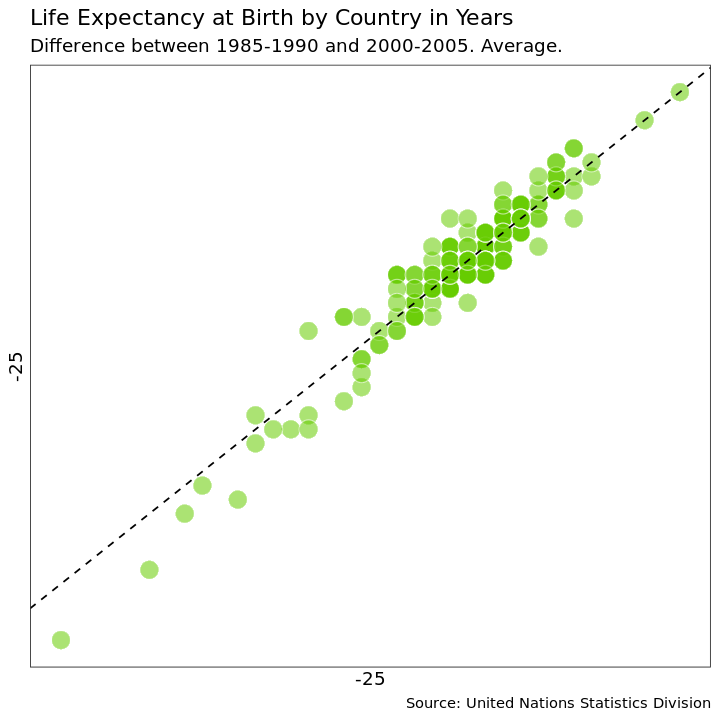

In [65]:
# Doing a nice first version of the plot with abline, scaling axis and adding labels
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(-25,25)+
  scale_y_continuous(-25,25)+

  labs(title="Life Expectancy at Birth by Country in Years",
       subtitle="Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
       theme_bw()

## 9. Reference lines II
<p>Adding reference lines can make plots easier to understand. We already added a diagonal line to visualize differences between men and women more clearly. Now we will add two more lines to help to identify in which countries people increased or decreased their life expectancy in the period analyzed.</p>

NULL

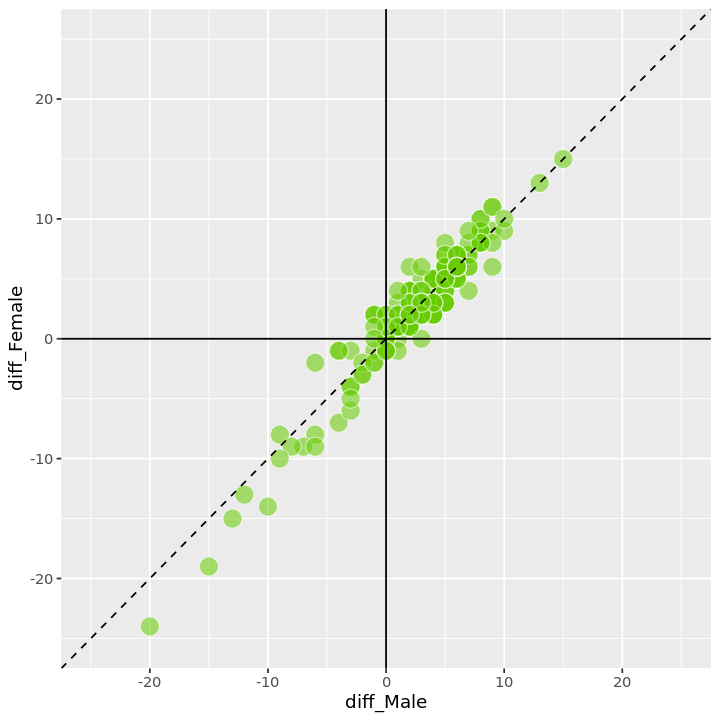

In [67]:
# Adding an hline and vline to previous plots
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(-25,25))+
  scale_y_continuous(limits=c(-25,25))+
  geom_hline(yintercept = 0)+
  geom_vline(xintercept = 0)

  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
theme_bw()

## 10. Highlighting remarkable countries II
<p>As we did in the first plot, let's label some points. Concretely, we will point those three where the aggregated average life expectancy for men and women increased most and those three where decreased most in the period.</p>

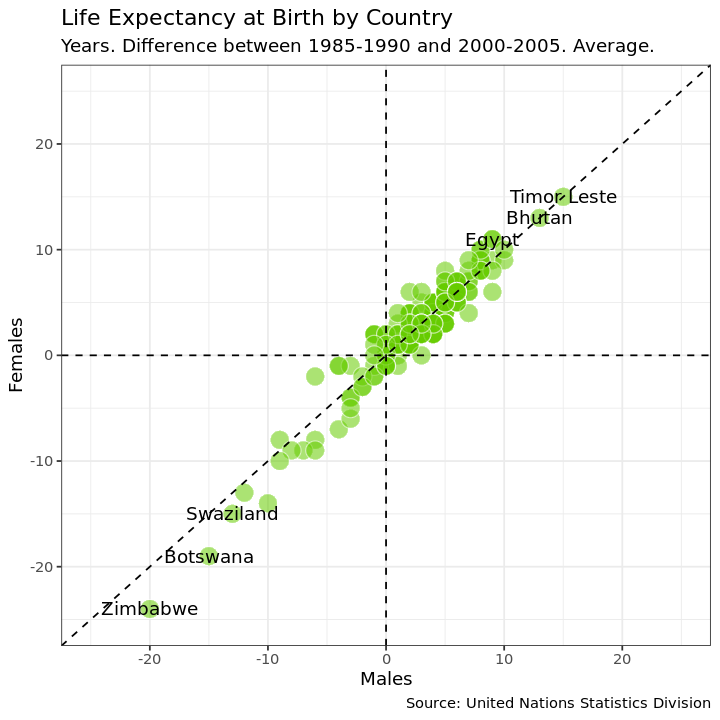

In [69]:
# Subseting data to obtain countries of interest
top <- subdata2 %>% arrange(diff_Male+diff_Female) %>% head(3)
bottom <- subdata2 %>% arrange(-diff_Male-diff_Female) %>% head(3)

# Adding text to the previous plot to label countries of interest
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area), guide=FALSE)+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(-25,25))+
  scale_y_continuous(limits=c(-25,25))+
  geom_hline(yintercept=0, linetype=2)+
  geom_vline(xintercept=0, linetype=2)+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  geom_text(data = top)+
  geom_text(data = bottom)+
  theme_bw()